In [1]:
! pip install -q kaggle



In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhipshadash","key":"efcaee3d9aeee5dd92dc5e7cbfacaf6c"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json



In [5]:
! kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zeesolver/spotfy                                               Spotify Songs Album                                 47KB  2024-05-10 09:21:57           2749         39  1.0              
rohit265/credit-card-eligibility-data-determining-factors      Credit Card Eligibility Data: Determining Factors  296KB  2024-05-18 11:31:28           1545         30  1.0              
guavocado/pokemon-stats-1025-pokemons                          Pokemon Stats (1025 Pokemons)                       44KB  2024-05-02 08:12:36           1370         27  1.0              
rejeph/air-pollution                                           air_pol

In [6]:
!kaggle datasets download -d prasoonkottarathil/polycystic-ovary-syndrome-pcos

Dataset URL: https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos
License(s): CC-BY-NC-SA-4.0
  0% 0.00/120k [00:00<?, ?B/s]
100% 120k/120k [00:00<00:00, 91.5MB/s]


In [7]:
!unzip "/content/polycystic-ovary-syndrome-pcos.zip" -d "/content/PCOS/"

Archive:  /content/polycystic-ovary-syndrome-pcos.zip
  inflating: /content/PCOS/PCOS_data_without_infertility.xlsx  
  inflating: /content/PCOS/PCOS_infertility.csv  


In [8]:
import pandas as pd
import pickle
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.svm import SVC

In [18]:
# for data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# for data resampling to remove imbalance
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.combine import SMOTEENN

# for feature selection
from sklearn.feature_selection import RFE

# for model training and visualization
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier

# for module performance evaluation
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, confusion_matrix

# for filtering out warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("/content/PCOS/PCOS_infertility.csv")
df = df.fillna(0)

In [10]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [11]:
df

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [13]:
inputs = df.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 'columns')

In [14]:
inputs.head(50)
inputx = inputs.head(4)

In [17]:
inputx
inputy = inputx.tail(2)


In [19]:
def printdf(data: any) -> pd.DataFrame:
    '''for returing readable dataframes'''
    return pd.DataFrame(data)

def plot_missing_vals(data: pd.DataFrame) -> None:
    '''for plotting missing values'''
    plt.figure(figsize = (16,7))
    plt.subplot(1,2,1)
    sns.heatmap(data.isnull(), cbar = True, vmin=0, vmax=1)
    plt.title("Missing Values Plot")
    plt.show()

def plot_heatmap(corr_matrix) -> None:
    '''for plotting heatmaps'''
    plt.subplot(figsize=(20,20))
    sns.heatmap(corr_matrix, square=True)

def create_countplots(df, features, target) -> None:
    for feature in features:
        plt.figure(figsize=(5,5))
        sns.countplot(data=df, x=feature,hue=target)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend()
        plt.title(f"Countplot for {feature}")
        plt.show()

def remove_outliers(data,feature):
        Q1 = np.percentile(data[feature],25,interpolation="midpoint")
        Q3 = np.percentile(data[feature],75,interpolation="midpoint")
        IQR = Q3-Q1
        upper = data[feature] >= (Q3+1.5*IQR)
        lower = data[feature] <= (Q1-1.5*IQR)

        return data[~(upper | lower)]

In [24]:
data = pd.read_excel("/content/PCOS/PCOS_data_without_infertility.xlsx", sheet_name=1)

In [25]:
data.drop(data.columns[data.columns.str.contains('Unnamed',case = False)], axis = 1, inplace = True)
printdf(data)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [26]:
print(data.shape)

(541, 44)


In [27]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [28]:
# dropping unique values: SL. No and patient file no.
data.drop(data.columns[:2], axis = 1, inplace=True)
data.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [29]:
#coverting object data type to numerical data
for feature in data[data.select_dtypes(include='object').columns]:
  data[feature] = pd.to_numeric(data[feature], errors='coerce')

data = data.rename(columns=lambda x: x.strip())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1   Age (yrs)               541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14  I   beta-HCG(mIU/mL)    541 non-null    fl

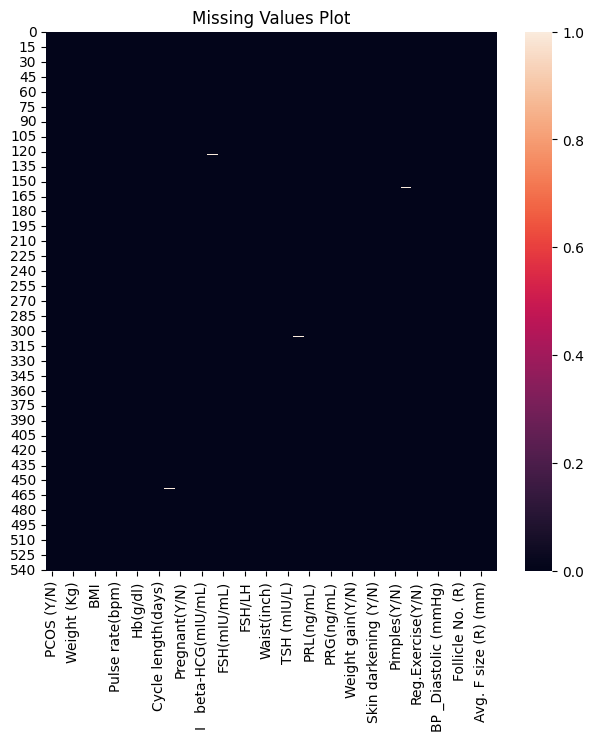

In [30]:
plot_missing_vals(data) # plotting a heatmap to visualize missing vals

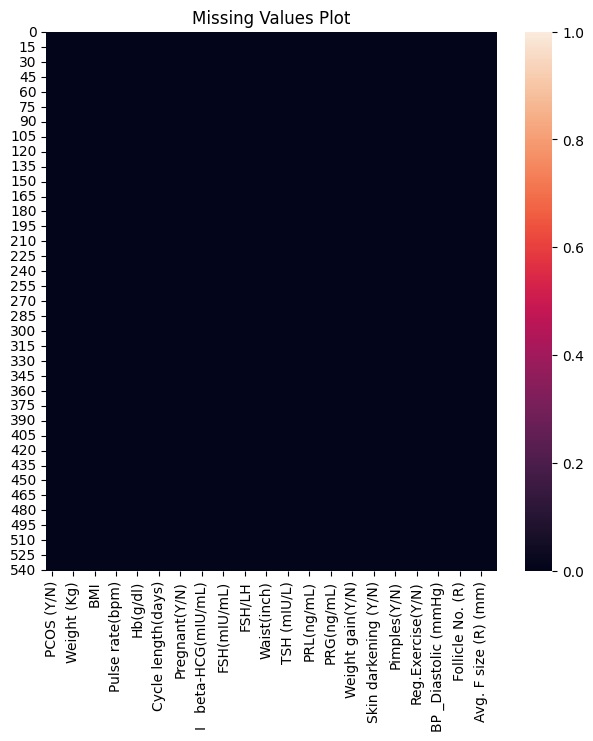

In [34]:
#populating the null values with mode of respective column
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mean(), inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].mode()[0], inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].mean(), inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].mean(), inplace=True)
plot_missing_vals(data) # plotting a heatmap to visualize missing vals

In [32]:
data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [35]:
# specifying target and features
target = 'PCOS (Y/N)'
all_features = list(data.columns[1:])
print('Target: ', target)
print('Features:', all_features)

Target:  PCOS (Y/N)
Features: ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


In [36]:
# creating referrences for features data, binary and non-binary features data
all_features = list(data.columns[1:])
features_df = data[all_features]
binary_features = features_df.columns[(features_df.max() == 1) & (features_df.min() == 0)]
print('binary features : ', binary_features)
binary_data = features_df[binary_features]

data.info()

binary features :  Index(['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1   Age (yrs)               541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null

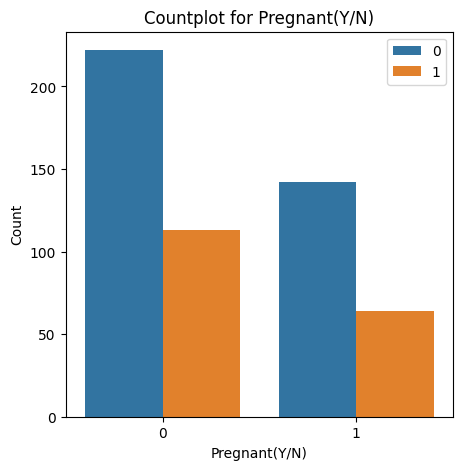

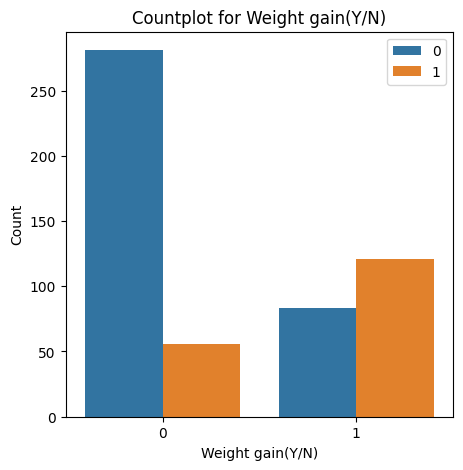

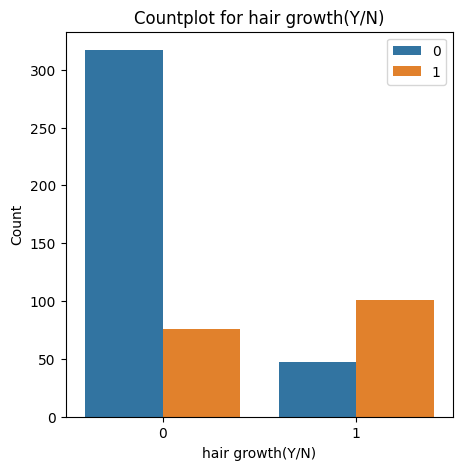

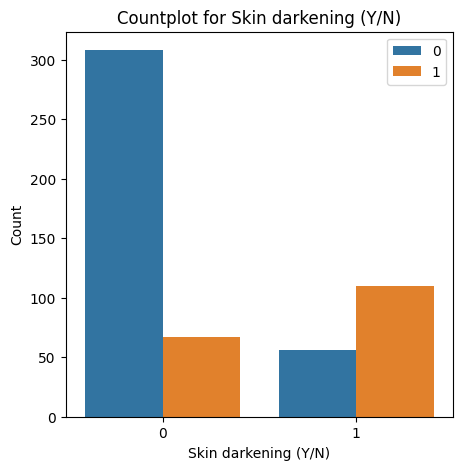

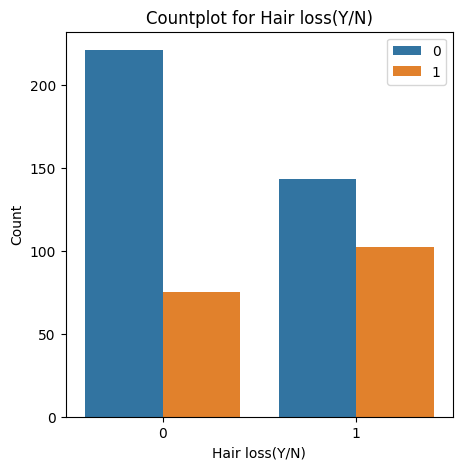

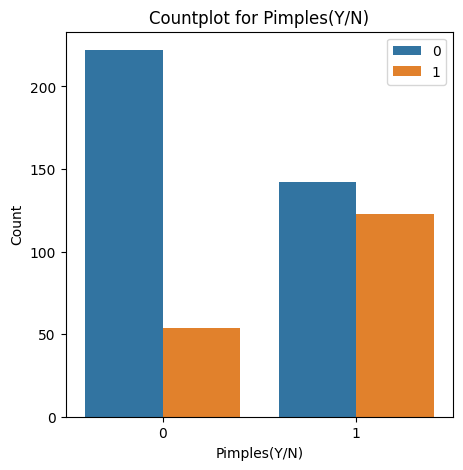

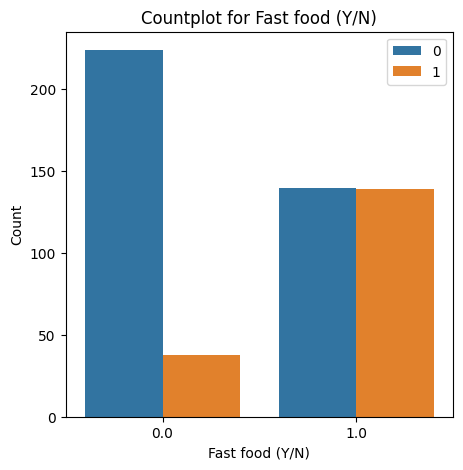

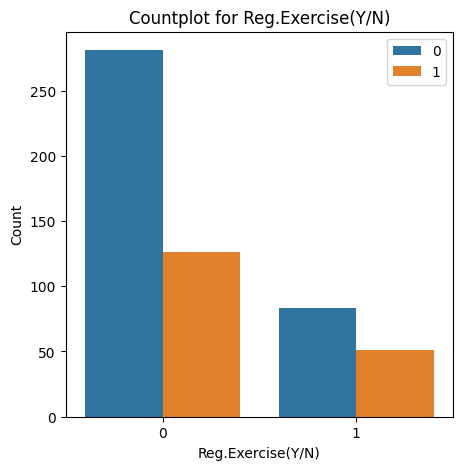

In [37]:
# creating countplot for binary features
create_countplots(data, binary_features, target)

In [38]:
# correlation matrix
corr_matrix = data.corr().abs()
corr_matrix[target].sort_values()

PRL(ng/mL)                0.005143
BP _Systolic (mmHg)       0.007942
TSH (mIU/L)               0.010140
Waist:Hip Ratio           0.012386
II    beta-HCG(mIU/mL)    0.013152
FSH/LH                    0.018336
Pregnant(Y/N)             0.027565
I   beta-HCG(mIU/mL)      0.027617
FSH(mIU/mL)               0.030319
Blood Group               0.036433
RR (breaths/min)          0.036928
BP _Diastolic (mmHg)      0.038032
PRG(ng/mL)                0.043834
RBS(mg/dl)                0.048922
No. of aborptions         0.057158
LH(mIU/mL)                0.063879
Reg.Exercise(Y/N)         0.065337
Height(Cm)                0.068254
Vit D3 (ng/mL)            0.085494
Hb(g/dl)                  0.087170
Pulse rate(bpm)           0.091821
Avg. F size (R) (mm)      0.097690
Endometrium (mm)          0.106648
Marraige Status (Yrs)     0.112681
Avg. F size (L) (mm)      0.132992
Hip(inch)                 0.162297
Waist(inch)               0.164598
Age (yrs)                 0.168513
Hair loss(Y/N)      

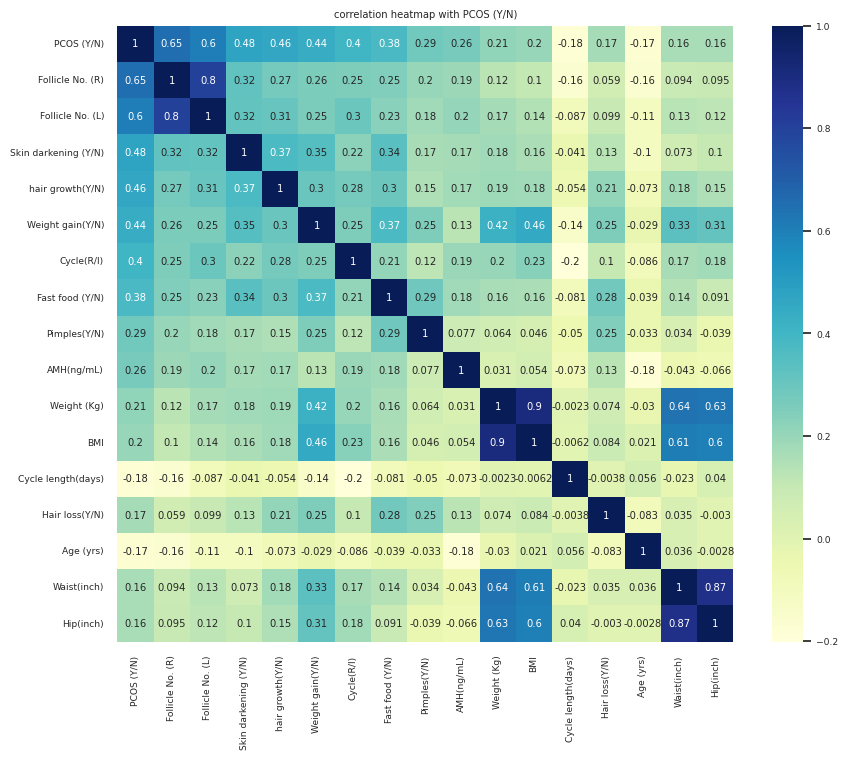

In [39]:
plt.figure(figsize=(10,8))
sns.set(font_scale=0.6)
indexes = corr_matrix.nlargest(17, target)[target].index
cm = pd.DataFrame(np.corrcoef(data[indexes].values.T))
sns.heatmap(data = cm, annot = True, yticklabels = indexes.values,
            xticklabels = indexes.values, cbar =True, cmap = 'YlGnBu',
            square = True)
plt.title(f"correlation heatmap with {target}")
plt.show()

In [41]:
import numpy as np
np.bool = np.bool_

In [42]:
correlation_threshold = 0.8 # threshold = 80%
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
highly_correlated_pairs = []

# Iterate through the DataFrame and find highly correlated feature pairs
for column in upper_triangle.columns:
    correlated_columns = upper_triangle.index[upper_triangle[column] >= correlation_threshold].tolist()
    for correlated_column in correlated_columns:
        pair = (column, correlated_column)
        highly_correlated_pairs.append(pair)
highly_correlated_pairs

[('BMI', 'Weight (Kg)'),
 ('FSH/LH', 'FSH(mIU/mL)'),
 ('Waist(inch)', 'Hip(inch)')]

In [43]:
# drop 'Weight (Kg)' and 'Hip(inch)' features from the data

data.drop(['Weight (Kg)'], axis=1, inplace=True)
data.drop(['Hip(inch)'], axis=1, inplace=True)

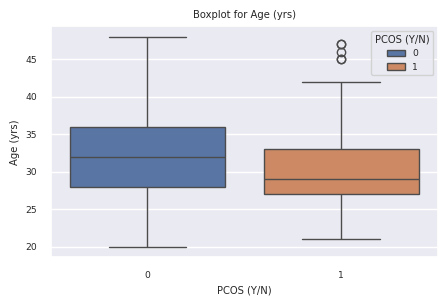

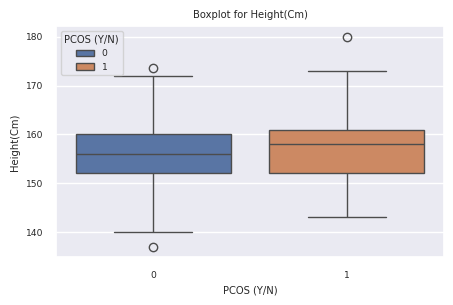

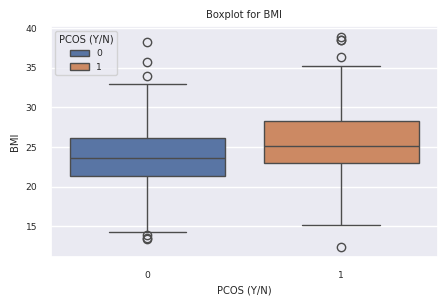

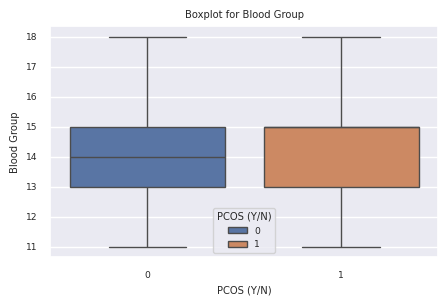

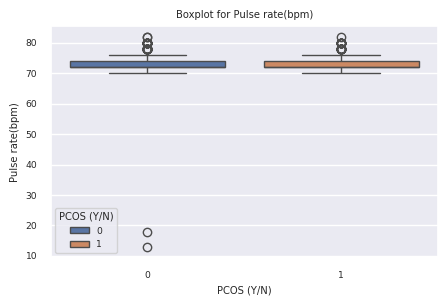

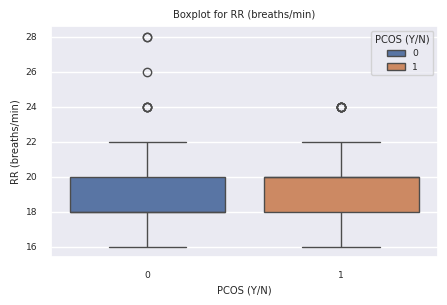

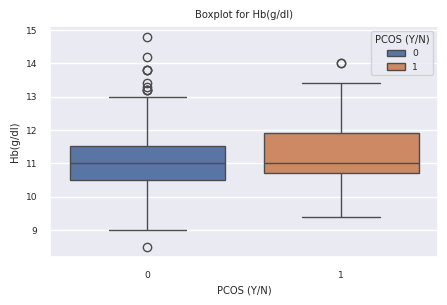

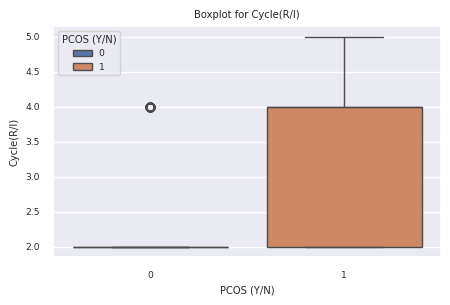

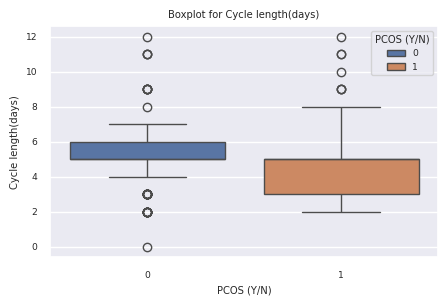

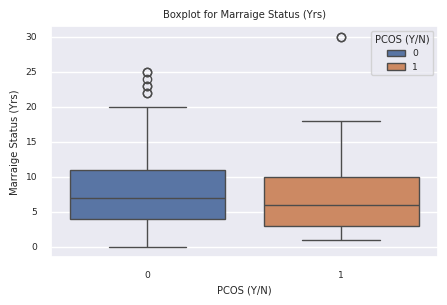

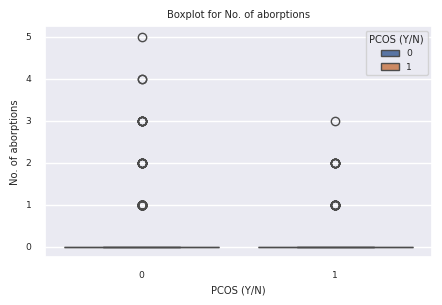

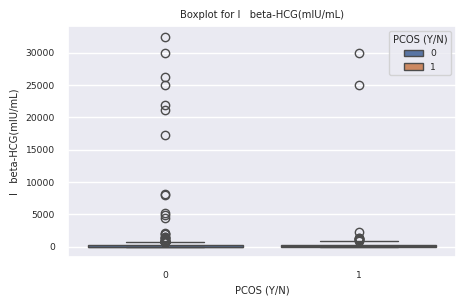

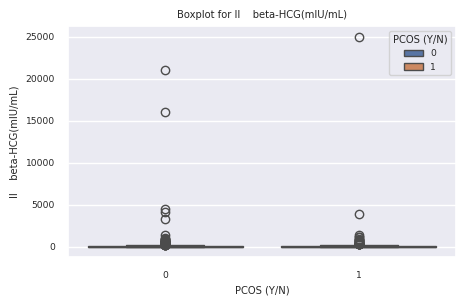

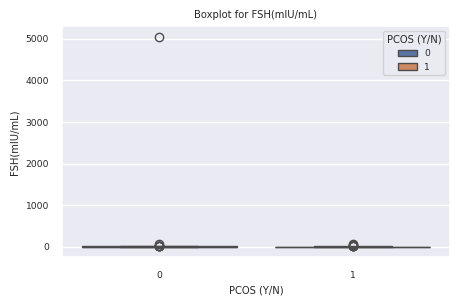

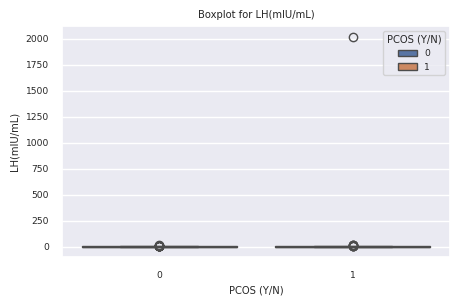

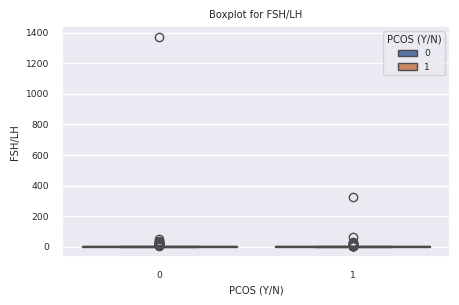

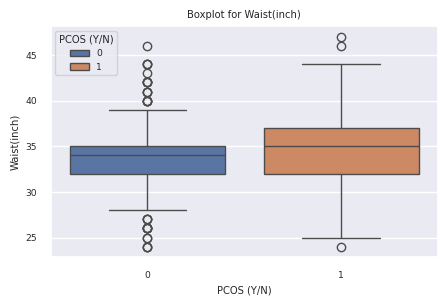

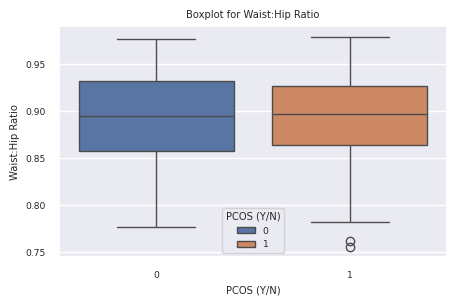

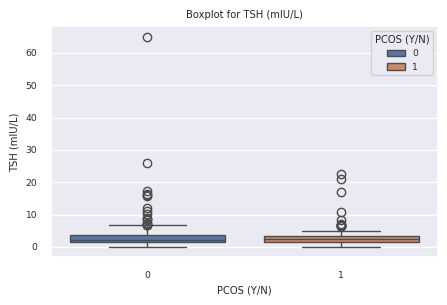

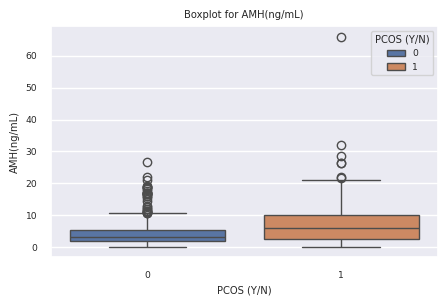

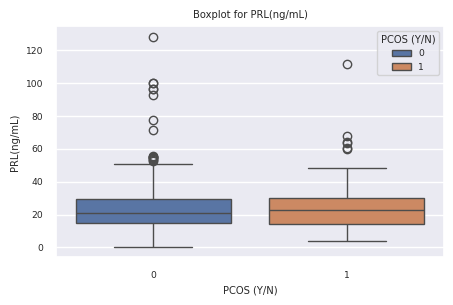

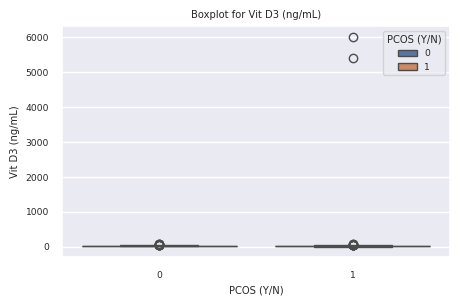

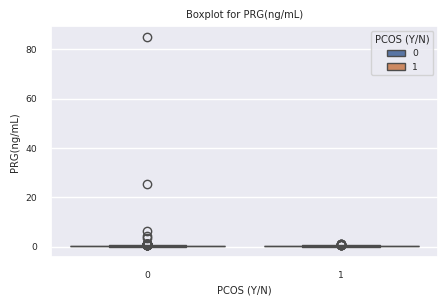

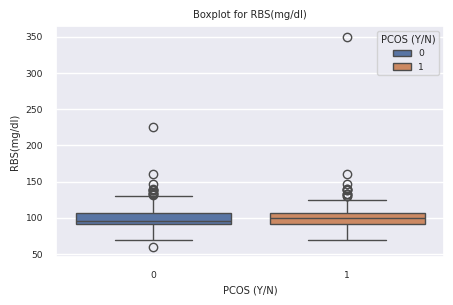

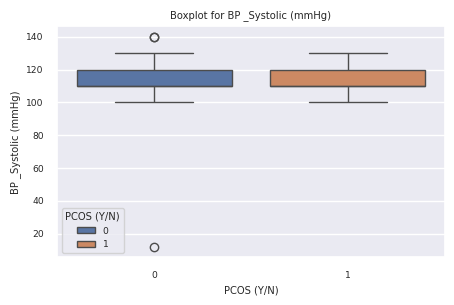

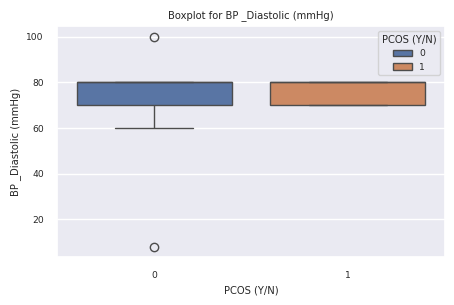

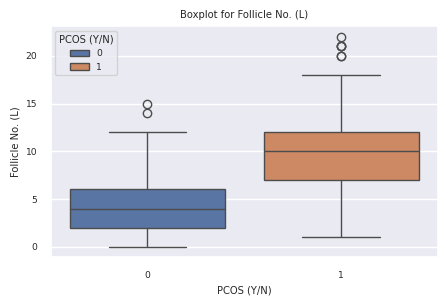

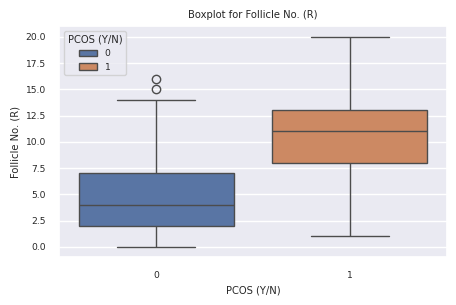

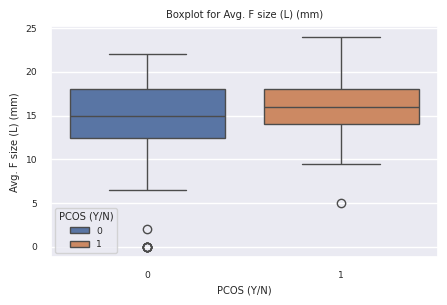

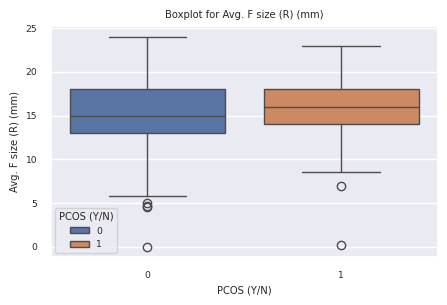

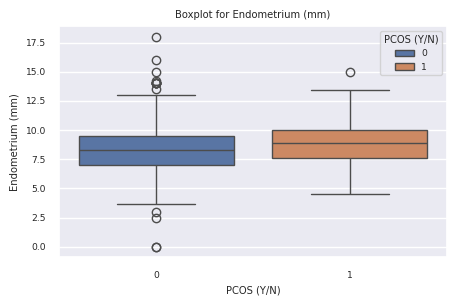

In [44]:
# box to visualize outliers
all_features = list(data.columns[1:])
features_df = data[all_features]
binary_features = features_df.columns[(features_df.max() == 1) & (features_df.min() == 0)]
nonbinary_data = features_df.drop(binary_features, axis=1)
for feature in nonbinary_data.columns.to_list():
  plt.figure(figsize=(5,3))
  sns.boxplot(data=data, x=target, y=feature, hue = target)
  plt.xlabel(target)
  plt.ylabel(feature)
  plt.title(f"Boxplot for {feature}")
  plt.show()

In [45]:
# removing outliers for 'BP _Systolic (mmHg)', "Pulse rate(bpm)", "Waist:Hip Ratio",
# 'BP _Systolic (mmHg)' and 'BP _Diastolic (mmHg)'

print("Old Shape: ", data.shape)
# outliers are removed from only those features where outlier distribution across PCOS -ve and
# PCOS +ve records is even.
features_to_filter = ['BP _Systolic (mmHg)', "Pulse rate(bpm)", "Waist:Hip Ratio", 'BP _Systolic (mmHg)',
                      'BP _Diastolic (mmHg)']
for feature in features_to_filter:
  data = remove_outliers(data,feature=feature)
  print("new Shape: ", data[feature].shape)

Old Shape:  (541, 40)
new Shape:  (538,)
new Shape:  (444,)
new Shape:  (444,)
new Shape:  (444,)
new Shape:  (443,)


In [46]:
# scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = data.columns
scaled_data.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

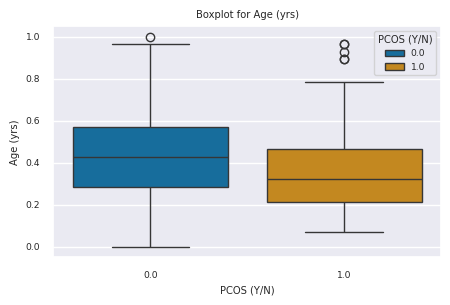

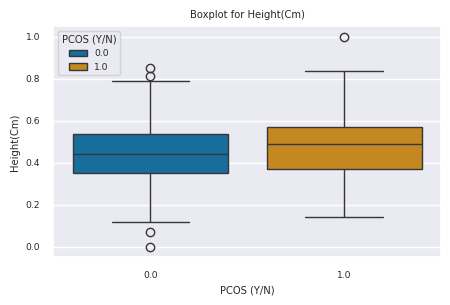

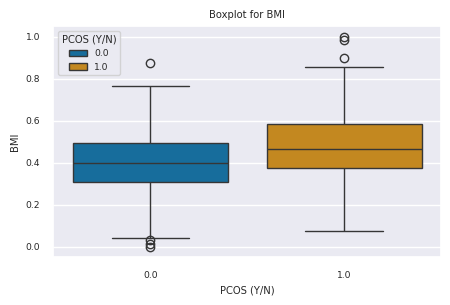

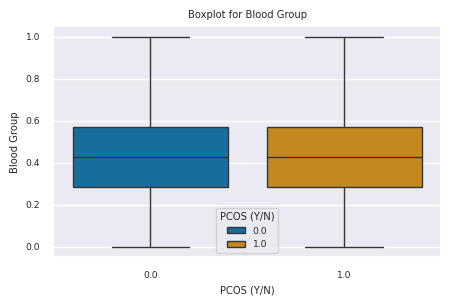

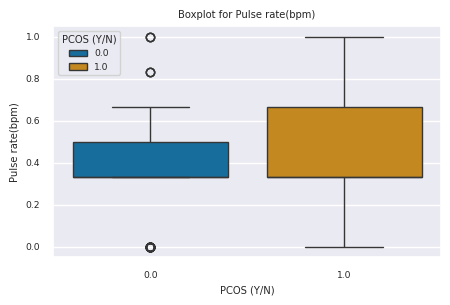

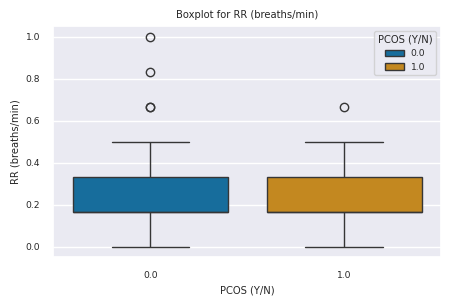

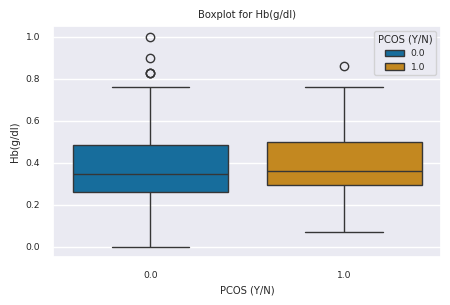

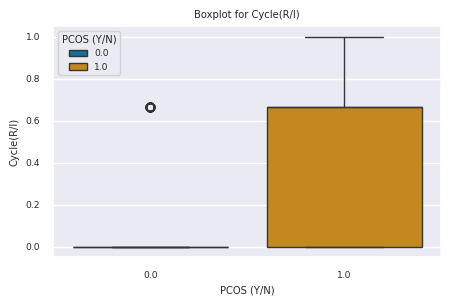

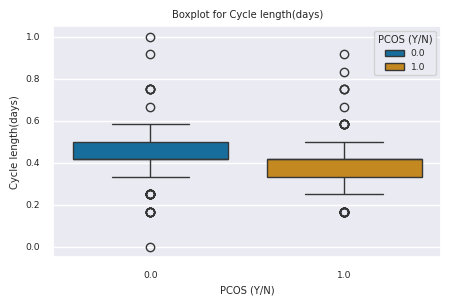

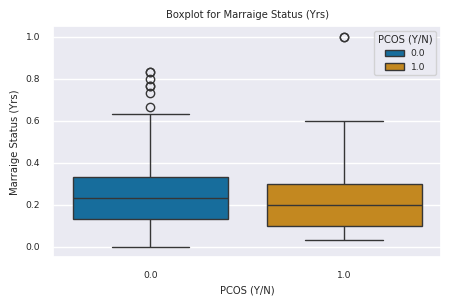

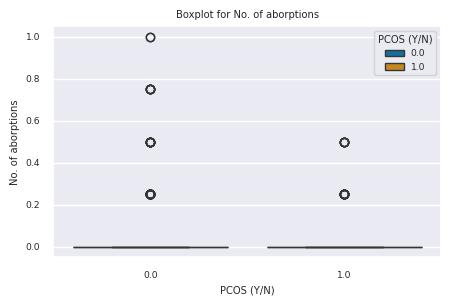

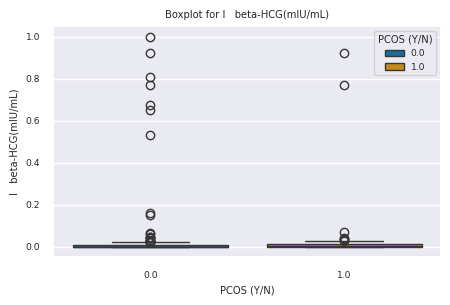

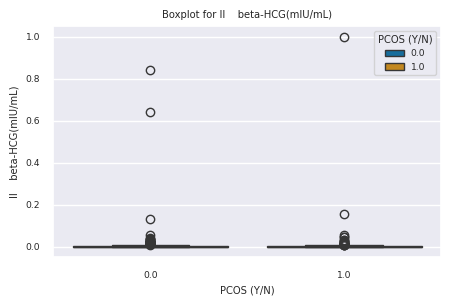

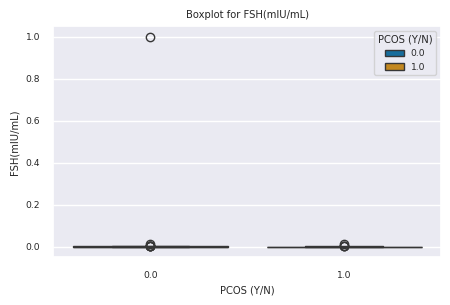

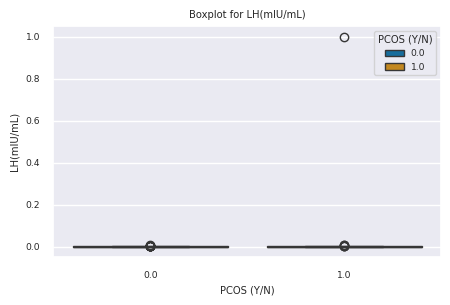

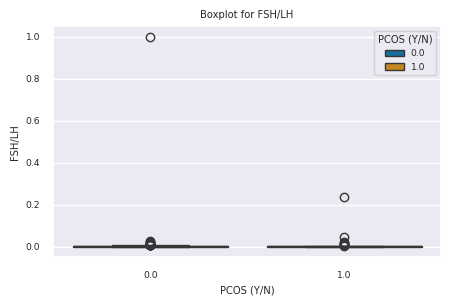

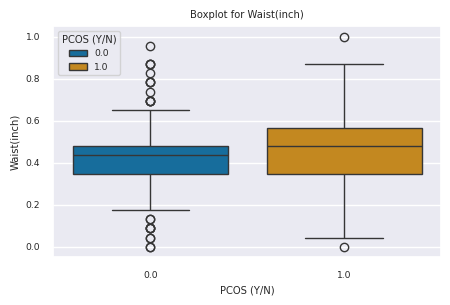

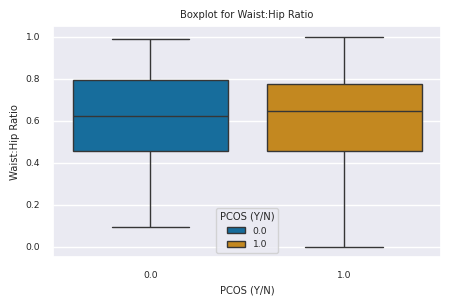

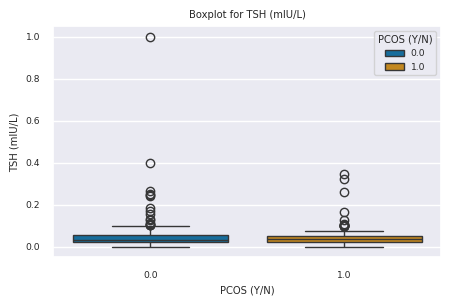

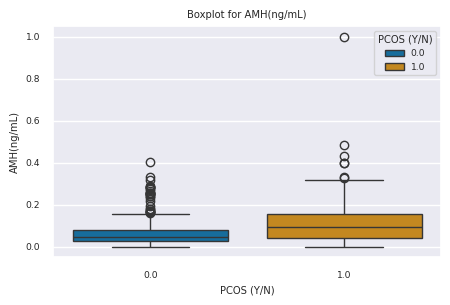

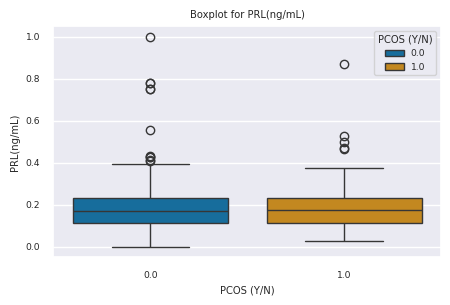

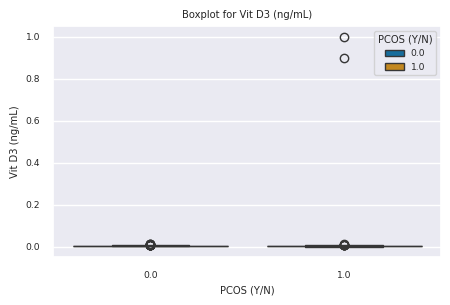

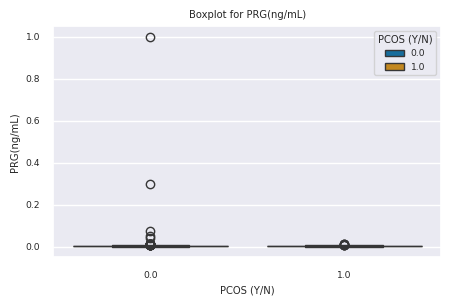

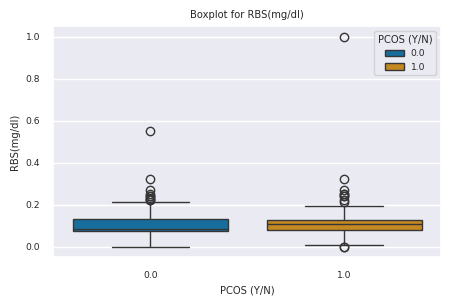

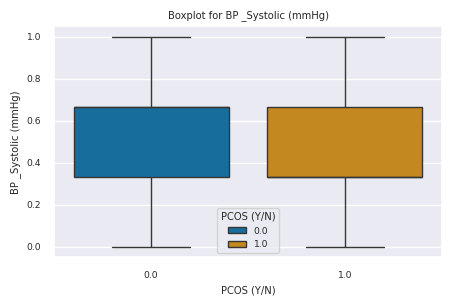

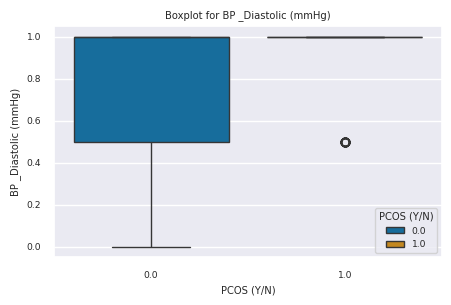

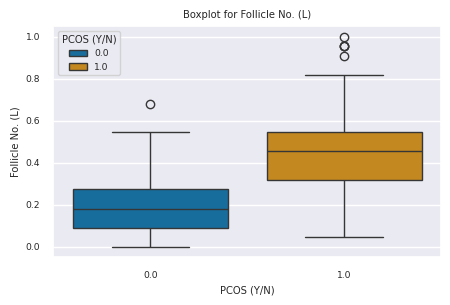

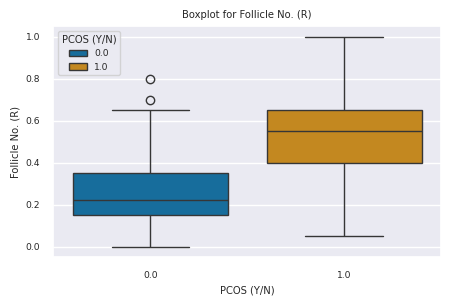

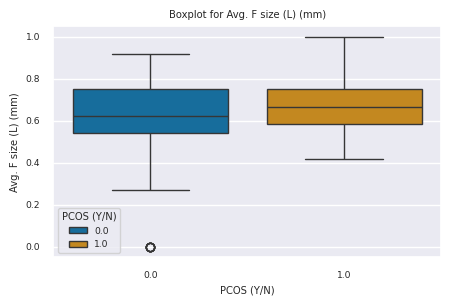

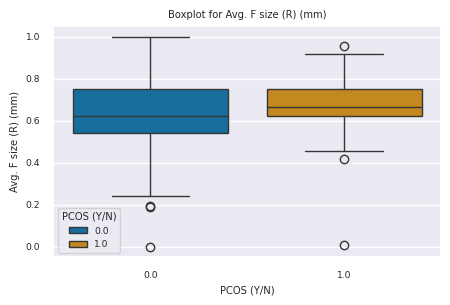

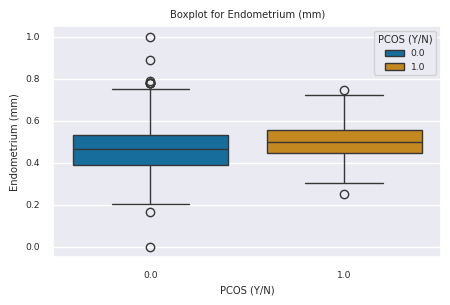

In [47]:
# box to visualize scaled data without outliers
for feature in nonbinary_data.columns.to_list():
  plt.figure(figsize=(5,3))
  sns.boxplot(data=scaled_data, x=target, y=feature, hue = target, palette = "colorblind")
  plt.xlabel(target)
  plt.ylabel(feature)
  plt.title(f"Boxplot for {feature}")
  plt.show()

In [48]:
data['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    302
1    141
Name: count, dtype: int64

In [49]:
#ADASYN

X = scaled_data.drop('PCOS (Y/N)', axis=1)
y = scaled_data['PCOS (Y/N)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN to the training set only
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)  # resampled data

print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_resampled.value_counts())

Original class distribution: PCOS (Y/N)
0.0    235
1.0    119
Name: count, dtype: int64
Resampled class distribution: PCOS (Y/N)
1.0    245
0.0    235
Name: count, dtype: int64


In [50]:
#SMOTE

X = scaled_data.drop('PCOS (Y/N)', axis=1)
y = scaled_data['PCOS (Y/N)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # resampled data

print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_resampled.value_counts())

Original class distribution: PCOS (Y/N)
0.0    235
1.0    119
Name: count, dtype: int64
Resampled class distribution: PCOS (Y/N)
0.0    235
1.0    235
Name: count, dtype: int64


In [51]:
#SMOTE-ENN

X = scaled_data.drop('PCOS (Y/N)', axis=1)
y = scaled_data['PCOS (Y/N)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-ENN to the training set only
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)  # resampled data

print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_resampled.value_counts())

Original class distribution: PCOS (Y/N)
0.0    235
1.0    119
Name: count, dtype: int64
Resampled class distribution: PCOS (Y/N)
1.0    183
0.0    166
Name: count, dtype: int64


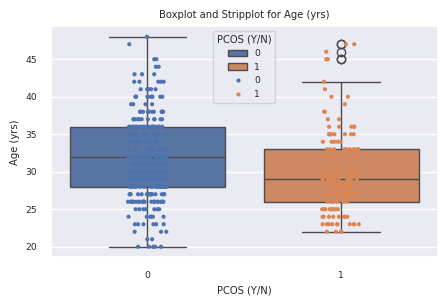

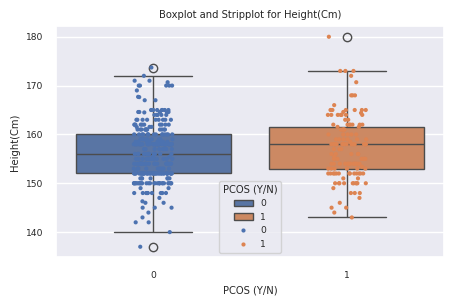

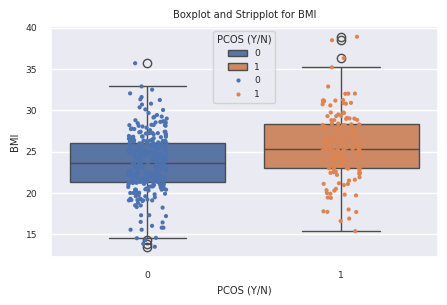

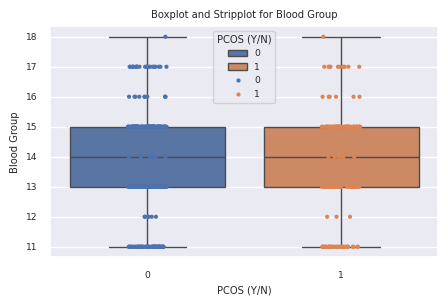

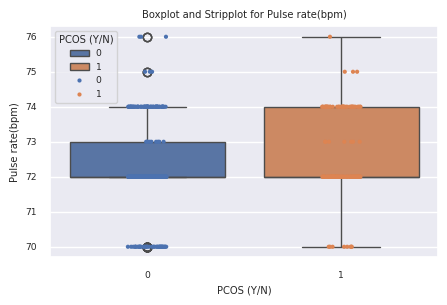

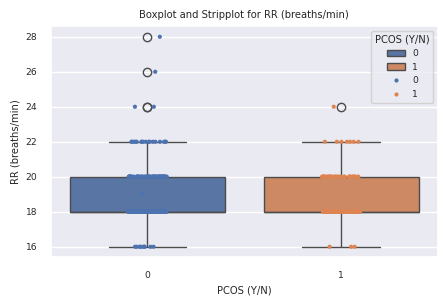

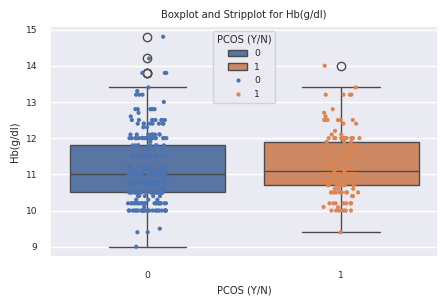

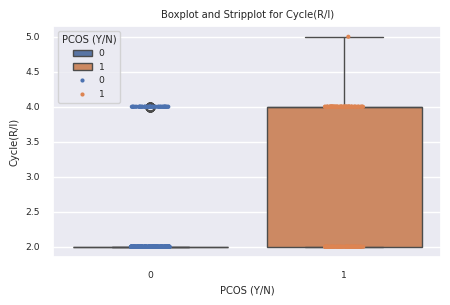

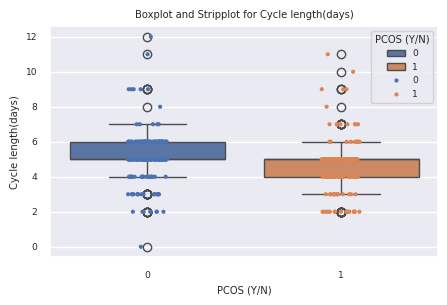

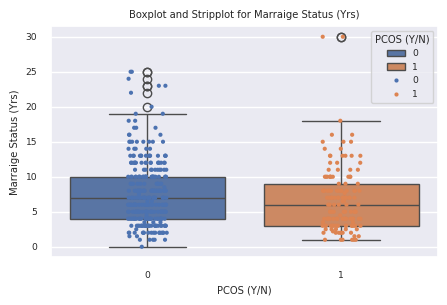

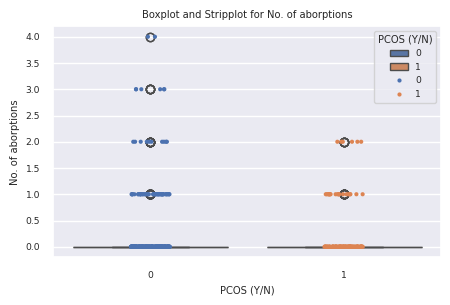

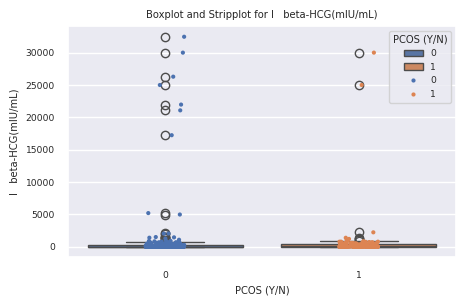

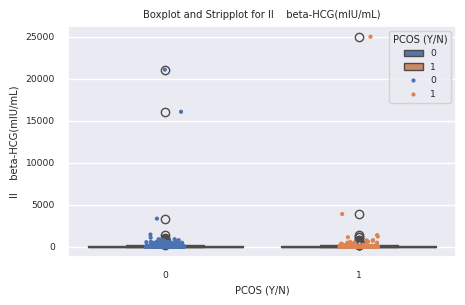

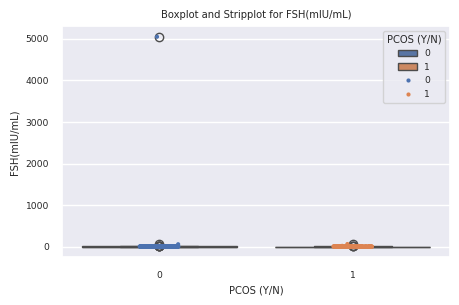

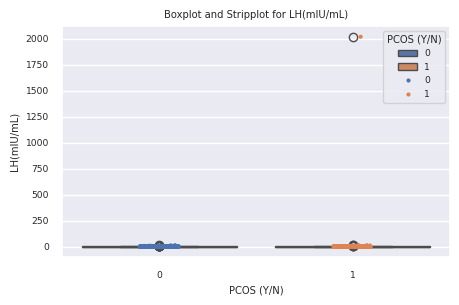

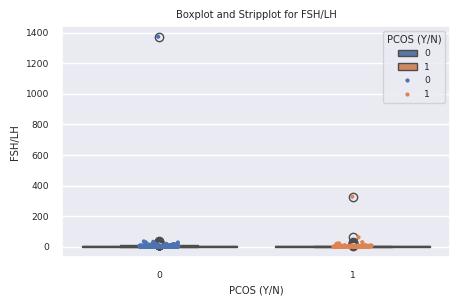

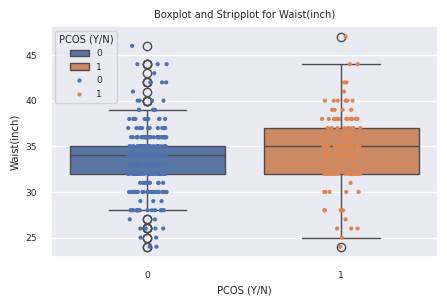

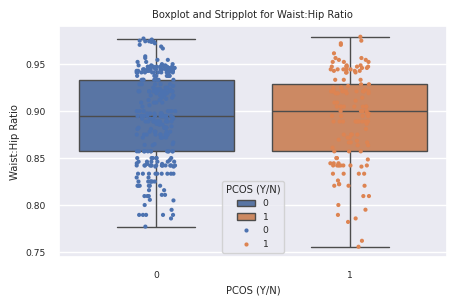

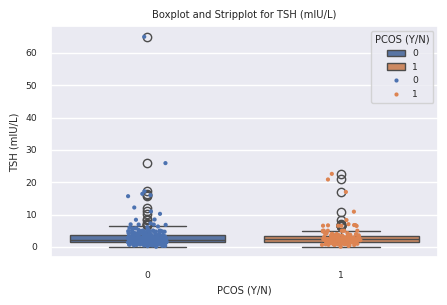

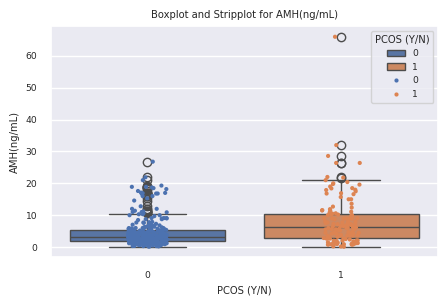

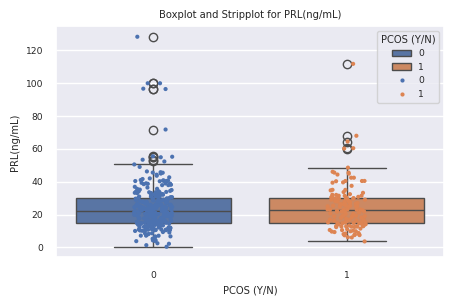

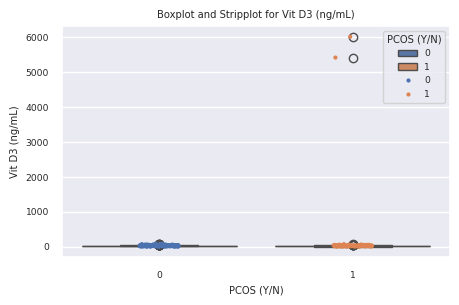

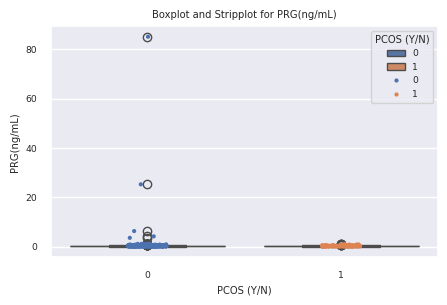

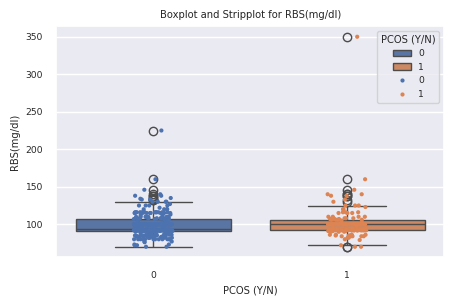

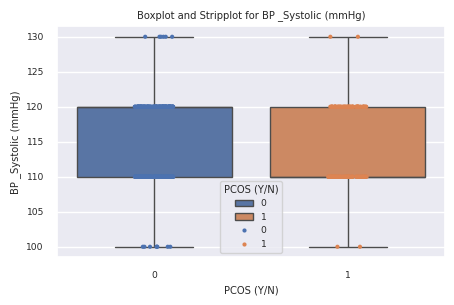

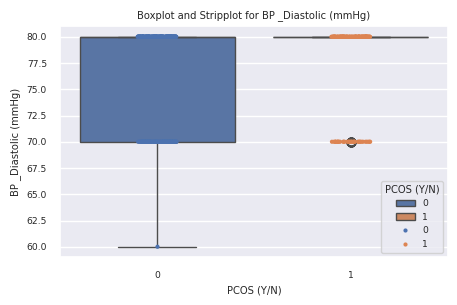

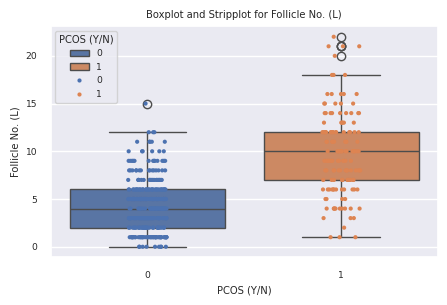

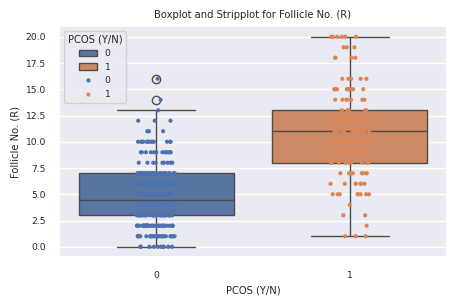

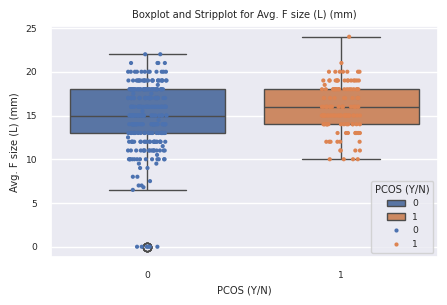

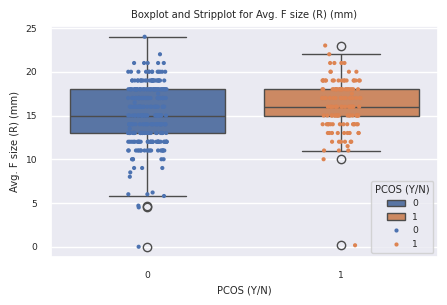

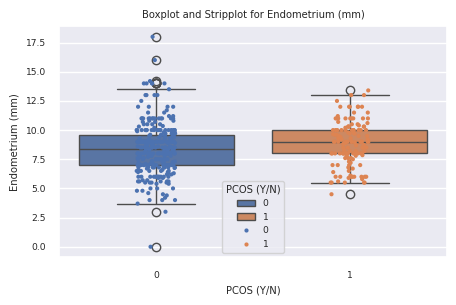

In [52]:
# box+strip plots for continuous data features to understand distribution
# of different features in conjunction with outliers
for feature in nonbinary_data.columns.to_list():
  plt.figure(figsize=(5,3))
  sns.boxplot(data=data, x=target, y=feature, hue = target)
  sns.stripplot(data=data, y=feature, x=target, jitter=True, size=3, hue=target)
  plt.xlabel(target)
  plt.ylabel(feature)
  plt.title(f"Boxplot and Stripplot for {feature}")
  plt.show()

In [53]:
data.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [54]:
# splitting the data
features_df = scaled_data[all_features]
target_data = scaled_data[target]

x_train_rfe, x_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.20)

features selected by lr:  Index(['Age (yrs)', 'Height(Cm)', 'Cycle(R/I)', 'Cycle length(days)',
       'Waist(inch)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


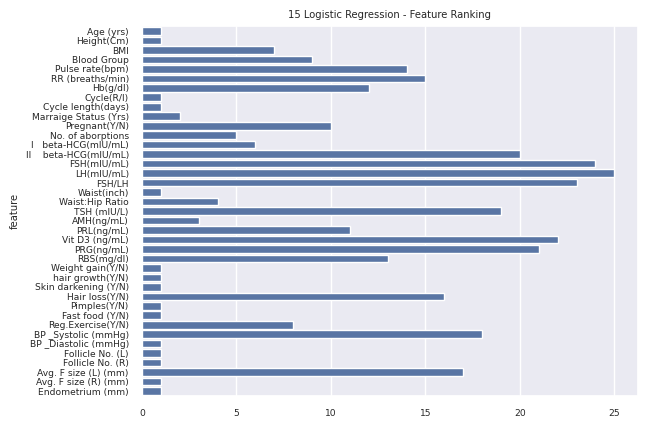

15 features selected by rfc:  Index(['Age (yrs)', 'BMI', 'Cycle(R/I)', 'Cycle length(days)',
       'I   beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Fast food (Y/N)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)'],
      dtype='object')


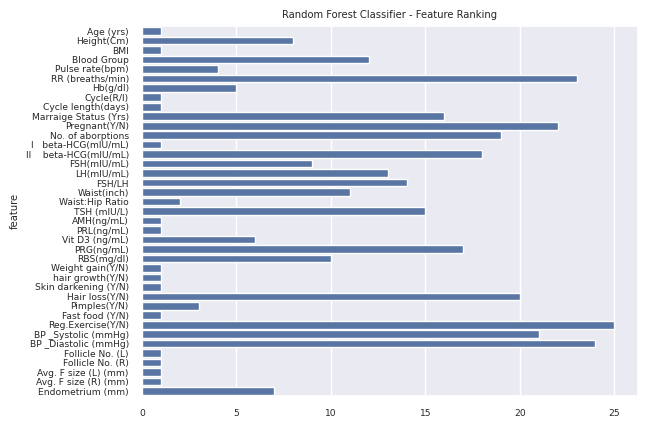

In [55]:
# Feature selection using RFE
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_rfc = RandomForestClassifier()
rfe_lr = RFE(model_lr, n_features_to_select=15)
rfe_rfc = RFE(model_rfc, n_features_to_select=15)

# Logistic regression
x_train_rfe_lr = rfe_lr.fit_transform(x_train_rfe, y_train_rfe)
features_lr_indices = [i for i, value in enumerate(rfe_lr.support_) if value]
features_lr = features_df.columns[features_lr_indices]
print("features selected by lr: ", features_lr)
x_train_rfe_lr = printdf(x_train_rfe_lr)
x_train_rfe_lr.columns = features_lr
# visualising ranking of features
sns.barplot(x=rfe_lr.ranking_, y=features_df.columns)
plt.title('15 Logistic Regression - Feature Ranking')
plt.ylabel("feature")
plt.show()

# random forest classifier
x_train_rfe_rfc = rfe_rfc.fit_transform(x_train_rfe, y_train_rfe)
features_rfc_indices = [i for i, value in enumerate(rfe_rfc.support_) if value]
features_rfc = features_df.columns[features_rfc_indices]
print("15 features selected by rfc: ", features_rfc)
x_train_rfe_rfc = printdf(x_train_rfe_rfc)
x_train_rfe_rfc.columns = features_rfc
# visualizing
sns.barplot(x=rfe_rfc.ranking_, y=features_df.columns)
plt.title('Random Forest Classifier - Feature Ranking')
plt.ylabel("feature")
plt.show()

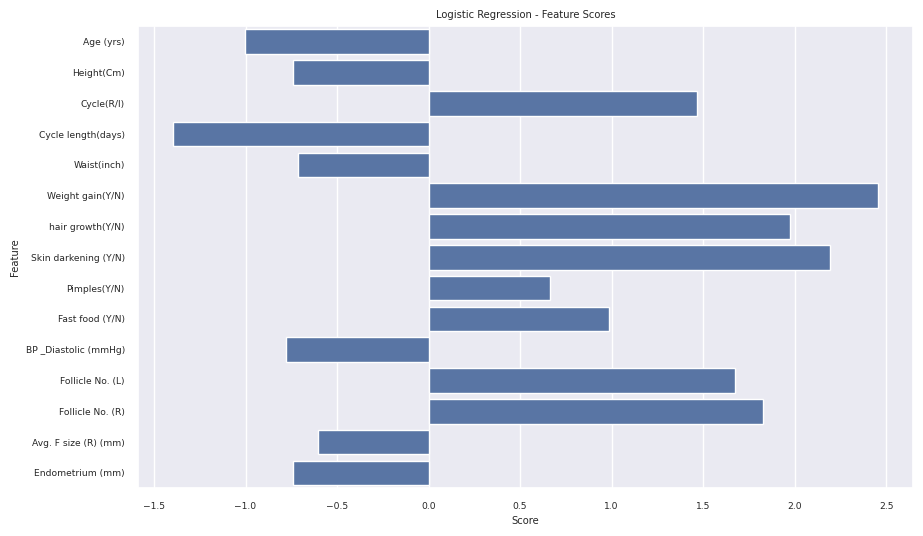

In [56]:
# Get scores for Logistic Regression
lr_model = rfe_lr.estimator_
lr_model.fit(x_train_rfe_lr, y_train_rfe)
lr_scores = lr_model.coef_[0]

# Visualizing scores for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=lr_scores, y=features_lr)
plt.title('Logistic Regression - Feature Scores')
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()

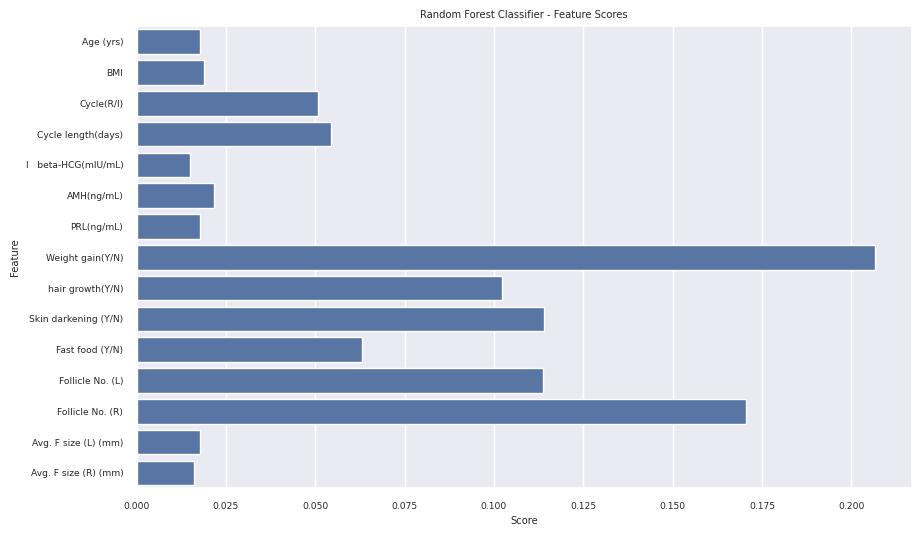

In [57]:
# Get scores for Random Forest Classifier
rfc_model = rfe_rfc.estimator_
rfc_model.fit(x_train_rfe_rfc, y_train_rfe)
rfc_scores = rfc_model.feature_importances_

# Visualizing scores for Random Forest Classifier
plt.figure(figsize=(10, 6))
sns.barplot(x=rfc_scores, y=features_rfc)
plt.title('Random Forest Classifier - Feature Scores')
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()

In [58]:
# evaluating performance of both models in terms of accuracy scores

print(x_train_rfe_lr.shape)
print(x_train_rfe_rfc.shape)
print(y_train_rfe.shape)
print(y_train.shape)

# train both models with selected features
model_lr.fit(x_train_rfe_lr, y_train_rfe)
model_rfc.fit(x_train_rfe_rfc, y_train_rfe)
#model_lr.fit(x_train_rfe_lr, y_train)

#model_rfc.fit(x_train_rfe_rfc, y_train)

# testing on y_test
y_pred_lr = model_lr.predict(x_test_rfe[features_lr])
y_pred_rfc = model_rfc.predict(x_test_rfe[features_rfc])

(279, 15)
(279, 15)
(279,)
(354,)


In [59]:
# evaluation
acc_lr = accuracy_score(y_test_rfe, y_pred_lr)
acc_rfc = accuracy_score(y_test_rfe, y_pred_rfc)

# results
print("accuracy_score of linear regression: ", acc_lr)
print("accuracy_score of Random forest: ", acc_rfc)

accuracy_score of linear regression:  0.9571428571428572
accuracy_score of Random forest:  0.9714285714285714


In [60]:
# function to get models
def getModels() -> dict:
  '''
  params: None
  returns:
  dict -> a dictionary of models

  getModels() returns the models required for use
  '''
  models = {
    'rfc': RandomForestClassifier(),
    'knn': KNeighborsClassifier(),
    #'svm': SVC(), #  --- toggled off
    #'lr': LogisticRegression(), #  --- toggled off
    'adb': AdaBoostClassifier(),
    #'nb':GaussianNB(), #  --- toggled off
    'xgb': XGBClassifier(),
  }
  return models

# function for getting base models for stacking
def getBaseModels(models: dict) -> list:
  '''
  params:
  models (dict) -> a dictionary of models
  returns:
  list -> a wrapped list of (name, model) pair tuples

  getBaseModels() takes the dictionary of models and makes them
  parameter ready for StackingClassifier making them estimators
  parameter ready
  '''
  base_models = []
  for name, model in models.items():
    base_models.append((name, models[name]))
  return base_models
# function to get the stacking model
def getStackedML(models : dict, meta_model = RandomForestClassifier()) -> StackingClassifier:
  '''
  params:
  models (dict) -> a dictionary of models for base models (estimators)
  meta_model (Any Classifier Object) [optional] -> the meta model (final_estimator), defaults to RandomForestClassifier()
  returns:
  StackingClassifier -> a fully configured StackingClassifier object

  getStackedML() stacks the base models provided with the meta model on top and returns the StackedClassifier object
  '''
  base_models = getBaseModels(models)
  model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
  return model

In [61]:
# dummy model parameters
param_grid = {
    'rfc': { # random forest classifier
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'criterion' : ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2'],
        'n_jobs': [-1]
    },
    'knn': { # k nearest neighbours classifier
        'n_neighbors': [5, 10, 15],
        'p': [1, 2],
        #'weights': ['uniform', 'distance'],
        'n_jobs': [-1]
    },
    'svm': { # support vector machine classifier
        'C': [0.1, 1, 10],
        'kernel': ['poly', 'sigmoid', 'rbf'],
        'degree': [3, 4],
        'coef0':[0.0, 1.0],
        'random_state': [42]
    },
    'lr': { # logistic regressor
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    },
    'adb': { # ada boost classifier
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'random_state': [42]
    },
    'nb': {}, # gaussian naive bayes classifier
    'xgb': { # extreme gradient boost classifer
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'learning_rate': [0.1, 0.01, 0.001],
        #'loss': ['log_loss', 'exponential'],
        #'criterion': ['friedman_mse', 'squared_error'],
        #'max_features': ['sqrt', 'log2'],
        'random_state': [42]
    },
    'stacked': { # stacking classifier

        'cv': [3, 5, 7],
    }
}

In [62]:
# function for getting the best and optimized models
def getBestModels(param_grid: dict, training_features: np.ndarray, training_target: np.ndarray) -> dict:
  '''
  params:
  param_grid (dict) -> a dictionary of dummy parameters
  for all models that are to be optimized
  training_features (numpy.ndarray) -> the training features set
  training_target (numpy.ndarray) -> the training target set
  returns:
  dict -> a dictionary of most optimized models

  getBestModels() uses GridSearchCV to optimize models
  retrieved from the models in getModels() function via
  a default value of 5 for K-Fold splits, and returns
  a dictionary of the optimized version of those models
  '''
  models = getModels()
  best_models = {}
  for name, model in models.items():
    if param_grid[name] != {}:
      grid_search = GridSearchCV(model, param_grid[name], cv=5, n_jobs=-1)
      grid_search.fit(training_features, training_target)
      best_model = grid_search.best_estimator_
      best_models[name] = best_model
  return best_models

# functions for getting the best model parameters
def getBestParams(param_grid : dict, features : np.ndarray, target: np.ndarray) -> dict:
  '''
  params:
  param_grid (dict) -> a dictionary of dummy parameters
  for all models that are to be optimized
  features (numpy.ndarray) -> the training features set
  target (numpy.ndarray) -> the target feature set
  returns:
  dict -> a dictionary of the best performing parameters
  for each specified model in getModels()

  getBestParams() returns a dict of the most optimal params
  for the models provided by getModels() function
  '''
  models = getModels()
  best_params = {}
  for name, model in models.items():
    if param_grid[name] != {}:
      grid_search = GridSearchCV(model, param_grid[name], cv=5, n_jobs=-1)
      grid_search.fit(features, target)
      best_params[name] = grid_search.best_params_
  return best_params

In [63]:
best_models_lr = getBestModels(param_grid, x_train_rfe_lr, y_train_rfe) # getting the best models on the raw training set
print(best_models_lr)

{'rfc': RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=300,
                       n_jobs=-1), 'knn': KNeighborsClassifier(n_jobs=-1, p=1), 'adb': AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42), 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...

In [64]:
best_models_rfc = getBestModels(param_grid, x_train_rfe_rfc, y_train_rfe) # getting the best models on the resampled training set
print(best_models_rfc)

{'rfc': RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=300,
                       n_jobs=-1), 'knn': KNeighborsClassifier(n_jobs=-1, p=1), 'adb': AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42), 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...

In [65]:
# function for calculating and plotting performance metrics
def calcPerfMetrics(models: dict, training_features: np.ndarray, training_target: np.ndarray, testing_features: np.ndarray, testing_target: np.ndarray):
  '''
  params:
  models (dict) -> a dictionary of models to perform metrics on
  training_features (numpy.ndarray) -> the training features set
  training_target (numpy.ndarray) -> the training target set
  testing_features (numpy.ndarray) -> the testing features set
  testing_target (numpy.ndarray) -> the testing target set
  returns:
  None

  calcPerfMetrics() plots the roc_curve and provides the
  classification_report and roc_auc_score for each model in
  the 'models' dict
  '''
  for name, model in models.items():
    model.fit(training_features, training_target)
    predictions = model.predict(testing_features)
    print(name.upper(), end='\n')
    print(classification_report(testing_target, predictions), end='\n')
    print(confusion_matrix(testing_target, predictions), end ='\n\n')
    fpr, tpr, thresholds = roc_curve(testing_target, predictions)
    plt.plot(fpr, tpr, label=name)
    auc = roc_auc_score(testing_target, predictions)
    print('AUC:', auc, end='\n\n')
  plt.legend()
  plt.show()

RFC
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        33
         1.0       0.97      1.00      0.99        37

    accuracy                           0.99        70
   macro avg       0.99      0.98      0.99        70
weighted avg       0.99      0.99      0.99        70

[[32  1]
 [ 0 37]]

AUC: 0.9848484848484849

KNN
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95        33
         1.0       0.95      0.97      0.96        37

    accuracy                           0.96        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70

[[31  2]
 [ 1 36]]

AUC: 0.9561834561834562

ADB
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        33
         1.0       0.97      0.97      0.97        37

    accuracy                           0.97        70
   macro avg       0.97   

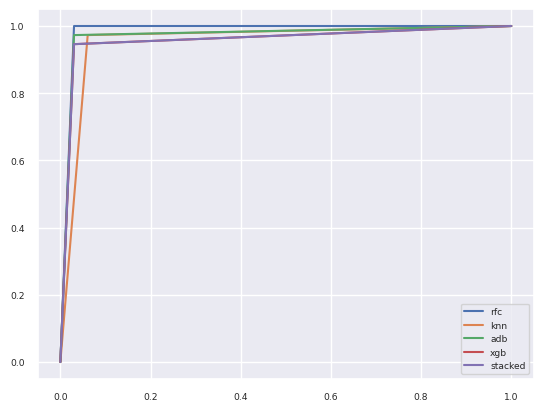

In [66]:
stacked_model = getStackedML(best_models_lr) # getting the stacked model
best_models_lr['stacked'] = stacked_model # adding the stacked model for iterative analysis
calcPerfMetrics(best_models_lr, x_train_rfe_lr, y_train_rfe, x_test_rfe[features_lr], y_test_rfe) # calculating and plotting the performance metrics

RFC
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        33
         1.0       0.97      0.97      0.97        37

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

[[32  1]
 [ 1 36]]

AUC: 0.9713349713349714

KNN
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        33
         1.0       0.97      0.97      0.97        37

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

[[32  1]
 [ 1 36]]

AUC: 0.9713349713349714

ADB
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        33
         1.0       0.97      1.00      0.99        37

    accuracy                           0.99        70
   macro avg       0.99   

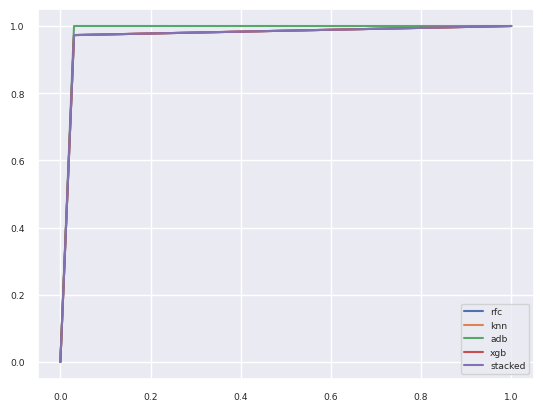

In [67]:
stacked_model_rfc = getStackedML(best_models_rfc)  # getting the stacked model
best_models_rfc['stacked'] = stacked_model  # adding the stacked model for iterative analysis
calcPerfMetrics(best_models_rfc, x_train_rfe_rfc, y_train_rfe, x_test_rfe[features_rfc], y_test_rfe) # calculating and plotting the performance metrics